# Enunciado projeto 03

O objetivo deste projeto é construir um modelo preditivo capaz de calcular o preço de um imóvel no bairro Vila Nova Conceição na cidade de São Paulo. 

Para completar este projeto cada aluno deverá seguir as orientações que estão neste notebook e preencher as células vazias. 

Este projeto é individual. O link do notebook totalmente preenchido deverá ser submetido no black até o dia 30/10/2019.

# Aquisição, pré-processamento e análise descritiva

In [0]:
import pandas
import io
import requests

url = "https://media.githubusercontent.com/media/fbarth/ml-espm/master/data/20140917_imoveis_filtrados_final.csv_shaped.csv"
s = requests.get(url).content
df = pandas.read_csv(io.StringIO(s.decode('utf-8')), sep=",")

In [0]:
df.head()

,bairro,preco,area,suites,dormitorios,banheiros,vagas
0,vila-nova-conceicao,490000.0,32.0,1.0,1.0,1.0,1.0
1,vila-nova-conceicao,3180000.0,157.0,2.0,2.0,2.0,2.0
2,vila-nova-conceicao,1900000.0,205.0,2.0,3.0,3.0,3.0
3,vila-nova-conceicao,3565000.0,193.0,3.0,3.0,3.0,3.0
4,vila-nova-conceicao,1605000.0,116.0,1.0,3.0,2.0,2.0


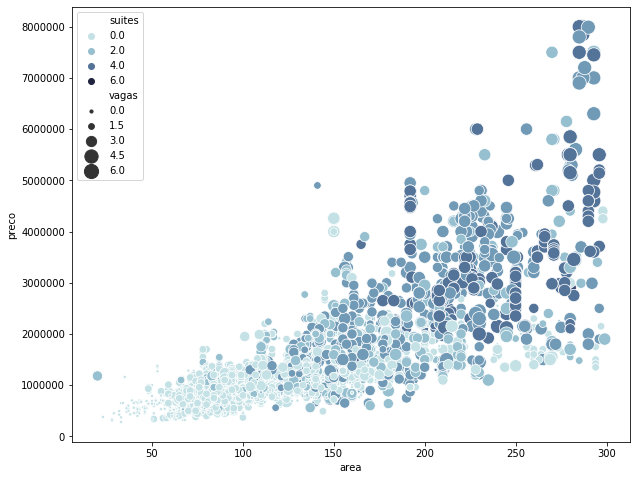

In [0]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(10, 8))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="area", y="preco",
                     hue="suites", size="vagas",
                     palette=cmap, sizes=(10, 200),
                     data=df)

In [0]:
df['bairro'].value_counts()

vila-mariana           1714
paraiso                 809
vila-nova-conceicao     794
vila-sonia              314
perto_ibirapuera        129
Name: bairro, dtype: int64

* Considere apenas os imóveis do bairo vila-nova-conceicao

In [0]:
df = df.loc[df.bairro == 'vila-nova-conceicao']

* Depois de considerar apenas os imóveis do bairro vila-nova-conceicao o tamanho do dataset precisa ser exatamente igual a: 

In [0]:
df.shape

(794, 7)

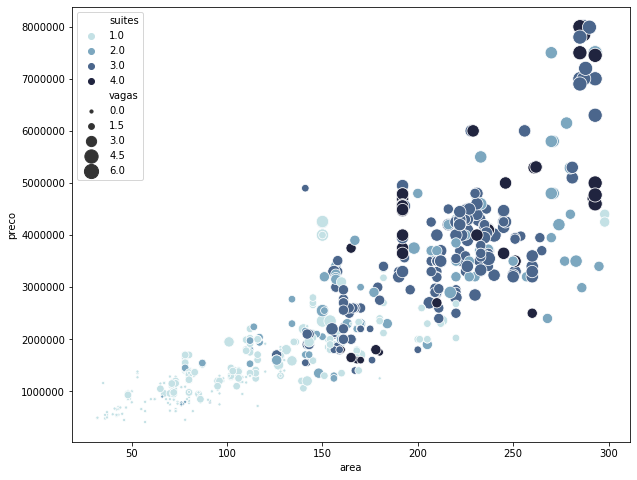

In [0]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(10, 8))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="area", y="preco",
                     hue="suites", size="vagas",
                     palette=cmap, sizes=(10, 200),
                     data=df)

In [0]:
df.head()

,bairro,preco,area,suites,dormitorios,banheiros,vagas
0,vila-nova-conceicao,490000.0,32.0,1.0,1.0,1.0,1.0
1,vila-nova-conceicao,3180000.0,157.0,2.0,2.0,2.0,2.0
2,vila-nova-conceicao,1900000.0,205.0,2.0,3.0,3.0,3.0
3,vila-nova-conceicao,3565000.0,193.0,3.0,3.0,3.0,3.0
4,vila-nova-conceicao,1605000.0,116.0,1.0,3.0,2.0,2.0


* A quantidade suites não pode ser maior que a quantidade de dormitórios e a quantidade de suites também não pode ser maior que a quantidade de banheiros. Exclua todos os exemplos que não satisfazem esta restrição. Estes exemplos provavelmente são erros de coleta de dados.

In [0]:
df = df.drop(df.query('suites > dormitorios').index, axis=0)
df = df.drop(df.query('suites > banheiros').index, axis=0)

* Depois deste filtro o dataset precisa ter o tamanho abaixo: 

In [0]:
df.shape

(772, 7)

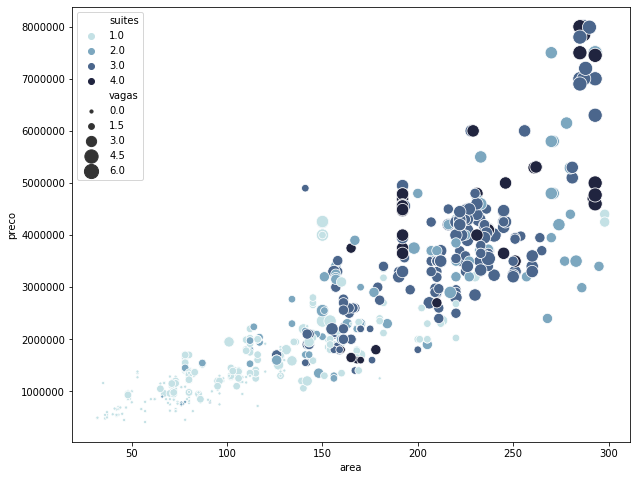

In [0]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(10, 8))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="area", y="preco",
                     hue="suites", size="vagas",
                     palette=cmap, sizes=(10, 200),
                     data=df)

* Visto que agora a variável bairro tem apenas um valor, você deve remover a mesma

In [0]:
df = df.drop('bairro', axis=1)

* Depois deste filtro o dataset precisa ter a seguinte estrutura:

In [0]:
df.head()

,preco,area,suites,dormitorios,banheiros,vagas
0,490000.0,32.0,1.0,1.0,1.0,1.0
1,3180000.0,157.0,2.0,2.0,2.0,2.0
2,1900000.0,205.0,2.0,3.0,3.0,3.0
3,3565000.0,193.0,3.0,3.0,3.0,3.0
4,1605000.0,116.0,1.0,3.0,2.0,2.0


* Qual é o valor mínimo e máximo dos preços dos imóveis? 

In [0]:
print('Valor mínimo:', df['preco'].min(), '\nValor máximo:', df['preco'].max())

Valor mínimo: 411500.0 
Valor máximo: 8000000.0


# Divisão dos datasets

In [0]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=4)

# Criação do modelo preditivo

Crie um modelo de regressão utilizando os algoritmos e transformações nos atributos que você considera mais adequados.

Descreva nas células abaixo todas as etapas necessárias para o desenvolvimento do modelo.

Reservei a célula abaixo apenas para importar a bibliotecas que seram utilizadas!

In [0]:
import numpy
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

Para buscar os melhores parâmetros para o meu modelo, utilizei do método `dataframe.corr()` para tirar a correlação dos parâmetros e, consequentemente, notar que os melhores são `area` e `vagas` que tem uma correlação muito alta, enquanto `suites` tem uma correlação um pouco alta também. O restante foi descartado.

In [0]:
df.corr()

,preco,area,suites,dormitorios,banheiros,vagas
preco,1.000000,0.869247,0.706759,0.533443,0.652802,0.865330
area,0.869247,1.000000,0.708540,0.686039,0.704269,0.810594
suites,0.706759,0.708540,1.000000,0.630690,0.786499,0.746206
dormitorios,0.533443,0.686039,0.630690,1.000000,0.662232,0.534780
banheiros,0.652802,0.704269,0.786499,0.662232,1.000000,0.659207
vagas,0.865330,0.810594,0.746206,0.534780,0.659207,1.000000


O método `dataframe.describe()` parecia uma boa maneira de analisar os parâmetros, mas acabou servindo apenas para uma melhor análise dos parâmetros já escolhidos anteriormente.

In [0]:
df.describe()

,preco,area,suites,dormitorios,banheiros,vagas
count,7.720000e+02,772.000000,772.000000,772.000000,772.000000,772.000000
mean,2.479498e+06,153.601036,1.953368,2.730570,3.209845,2.459845
std,1.507490e+06,67.076984,1.048946,0.951454,1.456683,1.102853
min,4.115000e+05,32.000000,1.000000,1.000000,1.000000,1.000000
25%,1.300000e+06,93.500000,1.000000,2.000000,2.000000,2.000000
50%,2.000000e+06,154.000000,2.000000,3.000000,3.000000,2.000000
75%,3.550000e+06,210.000000,3.000000,3.000000,4.000000,3.000000
max,8.000000e+06,298.000000,4.000000,4.000000,7.000000,5.000000


Nas células seguintes plotei gráficos de dispersão para verificar a linearidade da correlação dos parâmetros escolhidos. Para melhorar a visualização, transformei os dados em logaritmo, fazendo com que os mesmos deixem mais nítido sua linearidade.

Text(0, 0.5, 'Preço\n')

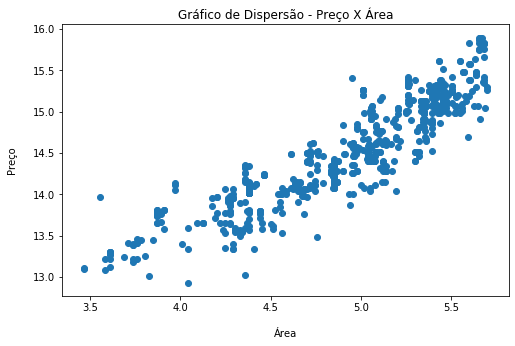

In [0]:
plt.figure(figsize=(8,5))
plt.scatter(numpy.log(df['area']), numpy.log(df['preco']))
plt.title('Gráfico de Dispersão - Preço X Área')
plt.xlabel('\nÁrea')
plt.ylabel('Preço\n')

Diferente da área, os outros parâmetros (vagas e suítes) não tem uma distribuição linear, então os gráficos não permitem uma visualização tão clara quanto o anterior.

Text(0, 0.5, 'Preço\n')

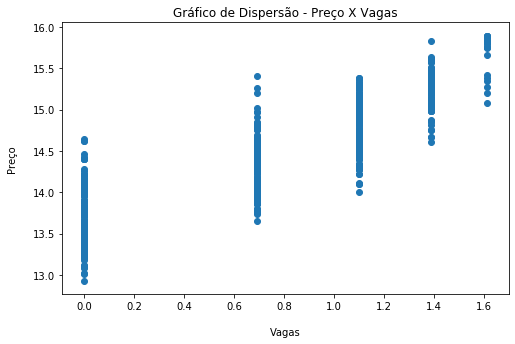

In [0]:
plt.figure(figsize=(8,5))
plt.scatter(numpy.log(df['vagas']), numpy.log(df['preco']))
plt.title('Gráfico de Dispersão - Preço X Vagas')
plt.xlabel('\nVagas')
plt.ylabel('Preço\n')

Text(0, 0.5, 'Preço\n')

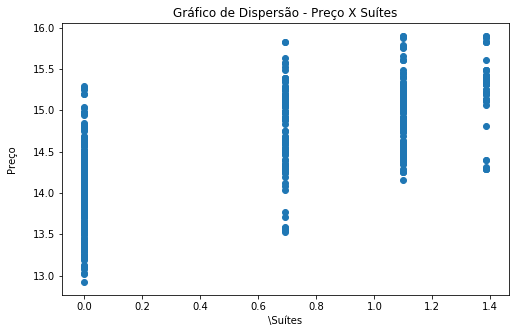

In [0]:
plt.figure(figsize=(8,5))
plt.scatter(numpy.log(df['suites']), numpy.log(df['preco']))
plt.title('Gráfico de Dispersão - Preço X Suítes')
plt.xlabel('\Suítes')
plt.ylabel('Preço\n')

Nesta célula eu refiz os datasets de X (treino e teste) para usar apenas os 3 melhores parâmetros para o modelo. Os datasets de y (treino e teste) também, porém transformei-os em um array unidimensional para melhorar a aprendizagem do modelo (visto que apenas os dados de entrada precisam ser bidimensionais).

In [0]:
X_train, y_train = train.loc[:, ['area', 'suites', 'vagas']].values, train['preco'].values
X_test, y_test = test.loc[:, ['area', 'suites', 'vagas']].values, test['preco'].values

Esta é uma das células mais importantes pois é onde executo um laço de repetição responsável pela criação de vários modelos com o intuito de achar o melhor. Conforme os modelos são criados, seus resultados de `r2` e a quantidade de árvores correspondente a esses resultados são armazenados em um dataframe o qual será usado posteriormente para saber qual o melhor modelo.

In [0]:
results = pandas.DataFrame(columns=['Árvores', 'r2'])
arvores = []
e_max = 1000
e_range = 20
i = 0

while(i < e_max):
  i += e_range
  arvores.append(i)

for arvris in arvores:
  rf = RandomForestRegressor(n_estimators=arvris, oob_score=True, max_features=2, random_state=400)
  rf.fit(X_train, y_train)
  results = results.append({'Árvores': arvris, 'r2': rf.oob_score_}, ignore_index=True)

Nesta célula é plotado um gráfico de linha mostrando como se comportou cada modelo baseado em seu `r2`. É de fácil visualização o que está acontecendo através deste gráfico! Seu eixo X é o `r2` e o eixo Y é a quantidade de árvores!

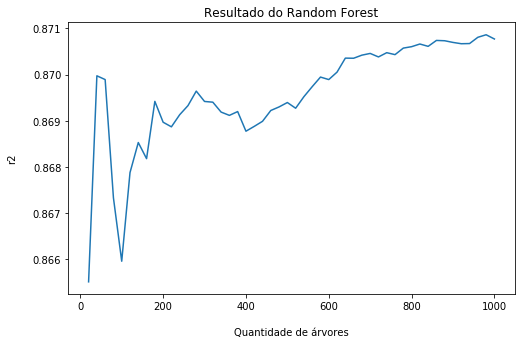

In [0]:
result_preview = pandas.Series(results['r2'].values, arvores)
plt.figure(figsize=(8,5))
plt.title('Resultado do Random Forest')
plt.xlabel('\nQuantidade de árvores')
plt.ylabel('r2\n')
plt.plot(result_preview)

# Validação do modelo

Valide o modelo desenvolvido considerando os datasets X_test e y_test. Espera-se que o erro médio absoluto seja inferior a duzentos mil reais (R$ 200.000,00). 

Descreva nas células abaixo todas as etapas necessárias para a validação do modelo.

Esta célula é responsável apenas para identificar qual o maior `r2` e, consequentemente, achar o índice da linha dentro do dataframe correspondente a este `r2` para poder achar a quantidade de árvores do melhor modelo com o intuito de utilizá-lo para predição.

In [0]:
rr2 = results['r2'].max()
rtree = results.loc[results.loc[results.r2 == rr2].index, ['Árvores']].values[0][0]
print('Melhor modelo\n-----------------------------\nr²: %.2f \nQuantidade de Árvores: %.f' % (rr2, rtree))

Melhor modelo
-----------------------------
r²: 0.87 
Quantidade de Árvores: 980


Por fim, mas não menos importante (por acaso, bastante importante), esta célula identifica o melhor modelo baseado no dataset criado anteriormente e cria um modelo baseado nele (usando a mesma *seed* para não generalizar o modelo e, consequentemente, perder o melhor modelo encontrado). No fim da célula ele encontra o `r2` e o `MAE` usando como parâmetro os valores reais e os preditos, e os printa.

In [0]:
rf = RandomForestRegressor(n_estimators=int(rtree), max_features=2, random_state=400)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

r2_pred = r2_score(y_test, y_pred)
mae_pred = mean_absolute_error(y_test, y_pred)

print('Modelo com %.f árvores\n-----------------------------\nr²: %.2f \nErro médio absoluto: %.f' % (rtree, r2_pred, mae_pred))

Modelo com 980 árvores
-----------------------------
r²: 0.91 
Erro médio absoluto: 284431
